# EC602 Fall 2024

# Assignment Three

Posted:  October 1, 2024 (finalized Oct 3)

Due:  October 22, 2024 (no class on Oct 15th)


Details
-------

Groups of 1, 2, or 3

Assignment value: one of ten required weekly assignments.


Assignment Description
----------------------

In this assignment, we explore the capabilities of number formats (for integers and real numbers)
with a focus on capabilities, storage and computation.


# Task 1: Exploring Numbers

## Part a: integer capabilities

Generate a Pandas DataFrame with the following columns:

- the number of bytes required in memory for this data type
- the largest possible value storable in this data type (N)
- the number of seconds $T_s$ your computer will take to count from 0 up to this number N
- the number of years $T_s$ represents

You should do this for all signed and unsigned numpy integer types.

Note: to calculate $T_s$, you may need to estimate the value using extrapolation.

In [ ]:
# Answer 1a

# unsigned
for x in [8,16,32,64]:
    print(2**x-1)

255
65535
4294967295
18446744073709551615


In [2]:
2**64 / 1e9 /60/60/24/365

584.942417355072

In [ ]:
import numpy as np
import pandas as pd
import time

data = []
types = ['int8', 'uint8', 'int16', 'uint16', 'int32', 'uint32', 'int64', 'uint64']


count_rate_per_sec = 1e8

for t in types:
    datatype = np.dtype(t)
    Bytes = datatype.itemsize

    if 'u' not in t:
        max_value = (2 ** (Bytes * 8 - 1)) - 1
    else:
        max_value = (2 ** (Bytes * 8)) - 1

    TS = max_value / count_rate_per_sec

    TY = TS / (60 * 60 * 24 * 365)

    data.append([t, Bytes, max_value, TS, TY])

df = pd.DataFrame(data, columns=['Data Type', 'Bytes Required', 'Max Value (N)', 'Time to Count (seconds)', 'Time to Count (years)'])

print(df)


  Data Type  Bytes Required         Max Value (N)  Time to Count (seconds)  \
0      int8               1                   127             1.270000e-06   
1     uint8               1                   255             2.550000e-06   
2     int16               2                 32767             3.276700e-04   
3    uint16               2                 65535             6.553500e-04   
4     int32               4            2147483647             2.147484e+01   
5    uint32               4            4294967295             4.294967e+01   
6     int64               8   9223372036854775807             9.223372e+10   
7    uint64               8  18446744073709551615             1.844674e+11   

   Time to Count (years)  
0           4.027144e-14  
1           8.085997e-14  
2           1.039035e-11  
3           2.078101e-11  
4           6.809626e-07  
5           1.361925e-06  
6           2.924712e+03  
7           5.849424e+03  


## Part b: integer underflow and overflow

Write functions `underflow_int` and `overflow_int` that will
generate integer underflows (creation of a number that is too small) and overflows (creation of a number that is too large) respectively.

The function should return the result in the same type that was passed into it.

In [10]:
# Answer 1b
import numpy as np

def underflow_int(value):
   datatype = np.dtype(type(value))
   bits = value.bit_length()
   max = (1 << (bits - 1)) - 1
   min = -(1 << (bits - 1))
   result = value + 1
   if result > max:
        result = min + (result - max - 1)
   return result
   pass


def overflow_int(value):
   datatype = np.dtype(type(value))
   bits = value.bit_length()
   max = (1 << (bits - 1)) - 1
   min = -(1 << (bits - 1))
   result = value + 1
   if result < min:
        result = max - (min - result - 1)
   return result
   pass

## Part c: float capabilities


Generate a Pandas DataFrame showing the capabilities of each of `numpy` float data types (-16,-32, and 64-bit precision)

For each data type, generate the following columns:

- the number of bytes required in memory for this data type
- the largest possible (non-infinite) value representable in this data type.
- the smallest possible (positive) value representable in this data type.
- the first (smallest positive) integer that is not representable in this data type.
- the approximate number of decimal digits of precision provided by this data type.

  

**to be fixed:**
float is non-linear so when it gets bigger it's more spread out so some numbers are not representable

In [2]:
import numpy as np
import pandas as pd

data = []
types = ['float16', 'float32', 'float64']

for t in types:
    datatype = np.dtype(t)
    Bytes = datatype.itemsize

    max_value = np.finfo(datatype).max
    min_value = np.finfo(datatype).min


    # Find the first unrepresentable integer

    min_unrepresentable_value = min_value - 1

    precision = np.finfo(datatype).precision

    data.append([t, Bytes, max_value, min_value, min_unrepresentable_value, precision])

df = pd.DataFrame(data, columns=['Data Type', 'Bytes Required', 'Max Value', 'Min Positive Value', 'First Unrepresentable Integer', 'Precision (Decimal Digits)'])

print(df)

  Data Type  Bytes Required      Max Value  Min Positive Value  \
0   float16               2   6.550400e+04       -6.550400e+04   
1   float32               4   3.402823e+38       -3.402823e+38   
2   float64               8  1.797693e+308      -1.797693e+308   

   First Unrepresentable Integer  Precision (Decimal Digits)  
0                  -6.550500e+04                           3  
1                  -3.402823e+38                           6  
2                 -1.797693e+308                          15  


# Task 2: communicating / storing numbers

In this task, we will compare the following methods for storing numbers to files:

- `numpy` save/load functions
- `numpy` savetxt/loadtxt functions
- `json` dump/load functions
- `pickle` dump/load functions
- `CSV` file formats pandas.read_csv and pandas.DataFrame.to_csv

## Part a: storage comparison function

Write a function `store_array` that creates a numpy array, and then stores it to
disk, reads it back, and calculates performance of the operation.

The function accepts as input

- the size of the array to create (N)
- the number of dimensions to use (M) (the array will be N x N x ... N) <- M times
- the data type to use (one of numpy: int16,int32,int64,float16,float32,float64)
- a random number generator to employ to populate the array
- the file name to store the result
- the format to use: one of "numpy", "txt", "json", "pickle", and "CSV"


The function should do the following tasks:


- create the random array as specified.
- store the file requested (time this operation)
- read the values back from the file created (time this operation)
- calculate the mean squared error of the result compared to the original.
- delete the file created.


The function returns:
- the created array
- the result read back from file
- a dictionary with the save time, the load time, the file size (in bytes), and the MSE of the result



In [24]:
import numpy as np
import json
import pandas as pd
import os
import random
import time
import pickle

def store_array(N, M, dtype, rng, filename, fileformat):
    A, Aretrieved = None, None
    shape = (N,) * M
    if 'int' in dtype:
        max_val = np.iinfo(dtype).max
        A = np.random.randint(0, max_val, size=shape, dtype=dtype)
    else:
        A = np.random.random(size=shape).astype(dtype)


    shape = A.shape
    df = pd.DataFrame(A)

    start_time = time.time()


    if fileformat == 'numpy':
        np.save(filename, A)
    elif fileformat == 'txt':
        np.savetxt(filename + '.txt', A.flatten())
    elif fileformat == 'json':
        df.to_json(filename + '.json', orient ='records')
    elif fileformat == 'pickle':
        with open(filename + '.plk', 'wb') as f:
            pickle.dump(A, f)
    elif fileformat == 'CSV':
        pd.DataFrame(A.reshape(-1, A.shape[-1])).to_csv(filename + '.csv', index=False, header=False)
    else:
        raise ValueError("Invalid data type, it has to be one of 'numpy','txt','json','pickle' or 'CSV'")

    save_time = time.time() - start_time

#Read the array back from disk
    read_time = time.time()

    if fileformat == 'numpy':
        Aretrieved = np.load(filename + '.npy')
    elif fileformat == 'txt':
        Aretrieved = np.loadtxt(filename + '.txt').reshape(shape)
    elif fileformat == 'json':
        Aretrieved = pd.read_json(filename + '.json')
        #Aretrieved = np.array(json.load(f))
    elif fileformat == 'pickle':
        with open(filename + '.plk', 'rb') as f:
           Aretrieved = pickle.load(f)
    elif fileformat == 'CSV':
        #Aretrieved = np.loadtxt(filename + '.csv', delimiter=',')
        Aretrieved = pd.read_csv(filename + '.csv', header=None).values.reshape(shape)
    # Get the correct filename based on the fileformat
    if fileformat == 'CSV':
        file_size = os.path.getsize(filename + '.csv')
    elif fileformat == 'pickle':
        file_size = os.path.getsize(filename + '.plk')
    elif fileformat == 'numpy':
        file_size = os.path.getsize(filename + '.npy')
    elif fileformat == 'txt':
        file_size = os.path.getsize(filename + '.txt')
    else:
        file_size = os.path.getsize(filename + '.json')

    read_time = time.time() - read_time
    #delete the file
    if fileformat == 'numpy':
        os.remove(filename + '.npy')
    elif fileformat == 'txt':
        os.remove(filename + '.txt')
    elif fileformat == 'json':
        os.remove(filename + '.json')
    elif fileformat == 'pickle':
        os.remove(filename + '.plk')
    elif fileformat == 'CSV':
        os.remove(filename + '.csv')

    MSE = np.mean((A - Aretrieved) ** 2)


    return A, Aretrieved, {"save":save_time,"load":read_time,"size":file_size, "MSE": MSE}


## Part b: testing, results, commentary, visualization

Write test and visualization code that uses `store_array` to compare and contrast the benefits of the various formats.

You can also write code and/or text that describes other pros/cons of the various storage methods.


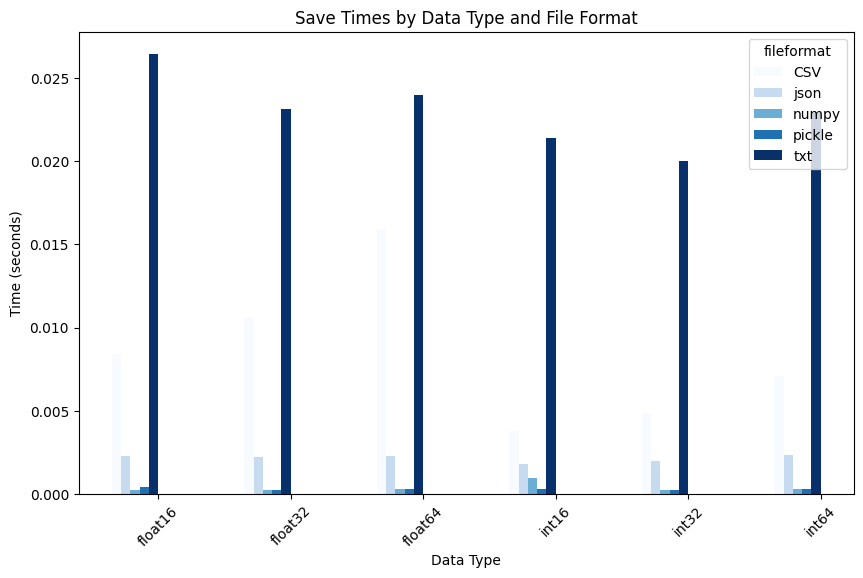

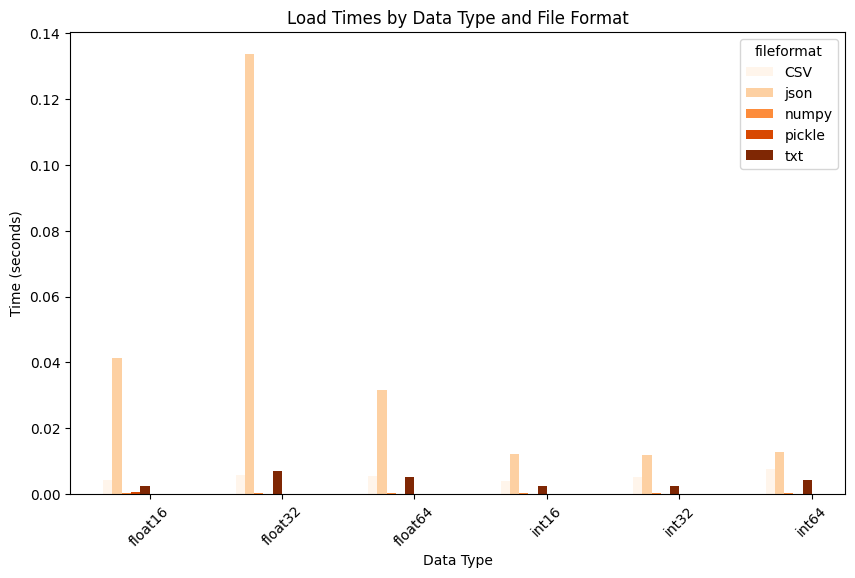

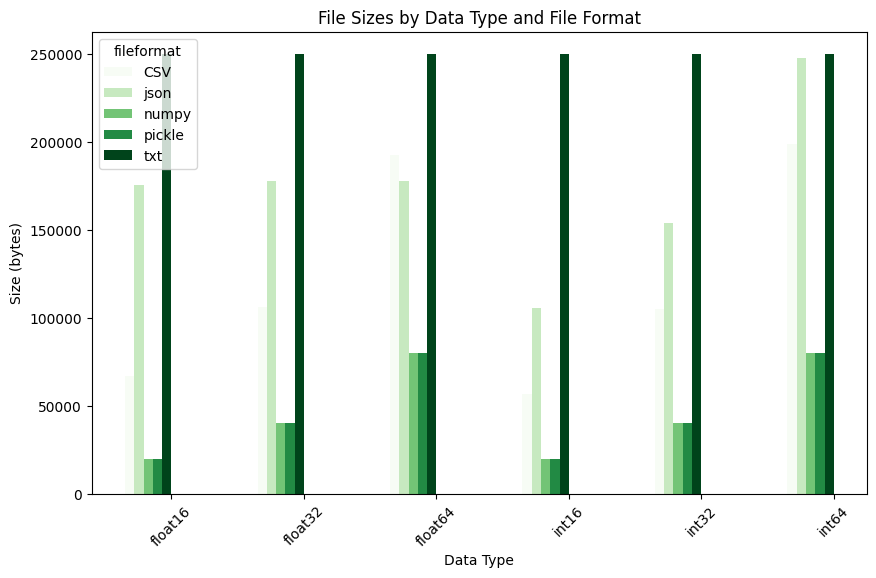

Mean Squared Errors across formats and data types:
      dtype fileformat           MSE
0     int16      numpy  0.000000e+00
26  float64        txt  0.000000e+00
25  float64      numpy  0.000000e+00
23  float32     pickle  0.000000e+00
21  float32        txt  0.000000e+00
20  float32      numpy  0.000000e+00
18  float16     pickle  0.000000e+00
16  float16        txt  0.000000e+00
15  float16      numpy  0.000000e+00
28  float64     pickle  0.000000e+00
13    int64     pickle  0.000000e+00
12    int64       json  0.000000e+00
14    int64        CSV  0.000000e+00
10    int64      numpy  0.000000e+00
1     int16        txt  0.000000e+00
2     int16       json  0.000000e+00
3     int16     pickle  0.000000e+00
11    int64        txt  0.000000e+00
5     int32      numpy  0.000000e+00
4     int16        CSV  0.000000e+00
6     int32        txt  0.000000e+00
7     int32       json  0.000000e+00
8     int32     pickle  0.000000e+00
9     int32        CSV  0.000000e+00
29  float64        CSV  

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
fileformats = ["numpy", "txt", "json", "pickle", "CSV"]
N = 100  # Size of the array
M = 2    # Number of dimensions

results = []

for dtype in dtypes:
    for fileformat in fileformats:
        _, _, data = store_array(N, M, dtype, np.random.rand, 'test_array', fileformat)

        results.append([dtype, fileformat, data['save'], data['load'], data['size'], data['MSE']])

df = pd.DataFrame(results, columns=['dtype', 'fileformat', 'save_time', 'load_time', 'file_size', 'MSE'])

fig, ax = plt.subplots(figsize=(10, 6))

save_times = df.pivot(index="dtype", columns="fileformat", values="save_time")
load_times = df.pivot(index="dtype", columns="fileformat", values="load_time")

save_times.plot(kind='bar', ax=ax, width=0.35, position=1, legend=True, colormap='Blues')
plt.title("Save Times by Data Type and File Format")
plt.ylabel("Time (seconds)")
plt.xlabel("Data Type")
plt.xticks(rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
load_times.plot(kind='bar', ax=ax, width=0.35, position=1, legend=True, colormap='Oranges')
plt.title("Load Times by Data Type and File Format")
plt.ylabel("Time (seconds)")
plt.xlabel("Data Type")
plt.xticks(rotation=45)
plt.show()

# File Size
fig, ax = plt.subplots(figsize=(10, 6))
file_sizes = df.pivot(index="dtype", columns="fileformat", values="file_size")
file_sizes.plot(kind='bar', ax=ax, width=0.35, position=1, legend=True, colormap='Greens')
plt.title("File Sizes by Data Type and File Format")
plt.ylabel("Size (bytes)")
plt.xlabel("Data Type")
plt.xticks(rotation=45)
plt.show()

# Print the MSE values to see if there's any significant difference
print("Mean Squared Errors across formats and data types:")
print(df[['dtype', 'fileformat', 'MSE']].sort_values(by='MSE'))


# Task 3: computational issues

This last part of the assignment is more open ended. Your task is to
design, implement, test, visualize, and summarize a comparison
of computational efficiencies of the four major integer types
(int8, int16, int32, and int64) and the three major float types (float16, float32, and float64)

You can compare between integer types but also integer vs float.

Please also compare between numpy operations and python operations (with standard int and float types).

As a result of your inquiries, you should generate tables and/or graphs
(based on results of your code) that illustrate the differences.

In particular, please focus on:
- what impact does "python code" e.g. for loops, have on your calculations?
- what kinds of array operations would be useful / most common for the data types in use?
- does the size of the array matter (ranging from individual values, to kilo- mega- or giga- sized collections) to average calculation speed per element? If so, develop and test theories
- are there parallelization / speedup tools available that change the results substantially?
- does error handling make a difference (run time checks on overflow, etc)
- can you compare speed benchmarks with other students in the course? What about AMD vs Intel vs Apple performance?
